In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, norm

Задача 1. 

В файле nissan.txt приведены данные о пробеге автомобиля Ниссан между заправками полного бака. Построить 95% доверительный интервал для среднего бутстрэпом с опцией normal. Сравнить с асимптотическим интервалом на основе нормального распределения.

In [ ]:
def read_data(path):
  df = pd.read_csv(path)
  array = np.array(df['mpg'])
  return array

def bootstrap_confidence_interval(sample_values, sample_count, sample_size, statistic, alpha):
  bootstrap_statistic = np.mean(
    np.random.choice(sample_values, (sample_count, sample_size)), axis=1)
  
  bootstrap_std_statistic = np.mean(np.power(bootstrap_statistic - statistic, 2))
  z = norm.ppf(1- alpha/2)
  left_interval, right_interval = statistic - z * bootstrap_std_statistic, statistic + z * bootstrap_std_statistic
  return left_interval, right_interval

def normal_confidence_interval(sample_values, sample_size, alpha):
  mean = sample_values.mean()
  std = sample_values.std() / np.sqrt(sample_size)
  z = t(df=sample_size-1).ppf(1-alpha/2)
  left_interval, right_interval = mean - z * std, mean + z * std
  return left_interval, right_interval

def plot_hist(array):
  counts, bins = np.histogram(array)
  plt.xlabel("sample value")
  plt.ylabel("value count")
  plt.stairs(counts, bins)

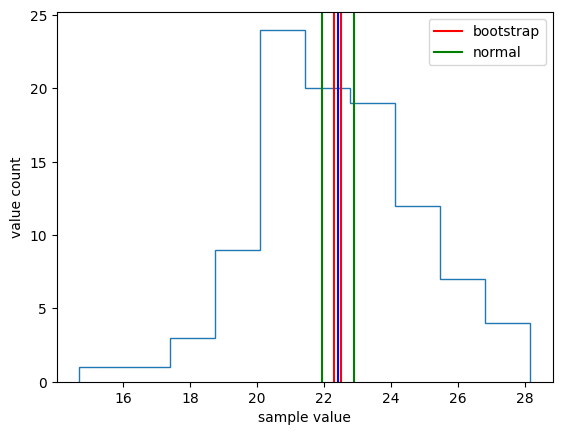

In [ ]:
path = "/content/drive/MyDrive/Colab Data/nissan.txt"

nissan_array = read_data(path)
plot_hist(nissan_array)

sample_size = len(nissan_array)
sample_count = 1000
alpha = 0.05
statistic = np.mean(nissan_array)
plt.axvline(x=statistic, color='b')
l1, r1 = bootstrap_confidence_interval(nissan_array, sample_count, sample_size, statistic, alpha)
plt.axvline(x=l1, color='r', label="bootstrap")
plt.axvline(x=r1, color='r')
l2, r2 = normal_confidence_interval(nissan_array, sample_size, alpha)
plt.axvline(x=l2, color='g', label="normal")
plt.axvline(x=r2, color='g')
plt.legend()
plt.show()

Задача 2.

В датасете faithful содержится информация о продолжительности извержений гейзеров и промежутках между ними. Построить 95% бутстрэп интервал для корреляции признаков. Зависимы ли они?

In [ ]:
path = "/content/drive/MyDrive/Colab Data/Faithful.txt"

df = pd.read_csv(path, sep="\t")
eruptions_array = df["eruptions"]
waiting_array = df["waiting"]

sample_size = round(df.shape[0] * 0.8)
sample_count = 100
alpha = 0.05

statistic = np.corrcoef(eruptions_array, waiting_array)[0, 1]

idx = np.random.choice(np.arange(df.shape[0]), (sample_count, sample_size))
bootstrap_statistic = np.array([
    np.corrcoef(eruptions_array[index], waiting_array[index])[0, 1] 
    for index in idx]
    )

pivotal_interval = np.sort(2 * statistic - bootstrap_statistic)
left_interval, right_interval = pivotal_interval[int(alpha*sample_count)], pivotal_interval[int((1-alpha)*sample_count)]

print(f"Statistic (Pearson Correlation Coefficient) = {statistic}")
print(f"Confidence Interval by bootstrap = [{left_interval}, {right_interval}]")
if left_interval*right_interval < 0:
  print("Featues are independent")
else:
  print("Featues are dependent")

Statistic (Pearson Correlation Coefficient) = 0.9008111683218126
Confidence Interval by bootstrap = [0.8845004050991813, 0.9204603656802921]
Featues are dependent
